In [1]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

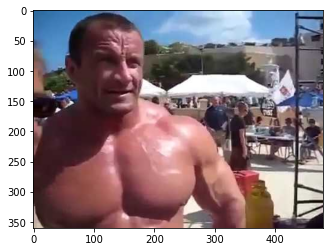

In [2]:
img_source = cv2.imread("pudzian.jpg")
plt.imshow(cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
message = "Ale to by nic nie dalo i tak, on mial... to by nic nie dalo nawet jakbym wygral nie daloby nic. Nie to jest mala roznica to by nic nie dalo bo on byl drugi w kulach, nawet jakbym byl pierwszy nie daloby nic bo ja bym musial byc pierwszy, on musialby byc czwarty a to by nic nie dalo. I tak by nic nie dalo i tak. yyyy nie ale to by nic nie dalo i tak. Nie nie daloby bo on byl drugi w kulach ja bym byl pierwszy nawet, to i tak by wygral. Nic by nie dalo. Nie daloby nic."
max_length = img_source[0].size

if (len(message) > max_length):
  print("Message too long for this picture")
else:
  print(f"Message length OK: {len(message)}/{max_length}")

Message length OK: 471/1440


In [4]:
m = [ord(c) for c in message]

print(m[:17], '...')

[65, 108, 101, 32, 116, 111, 32, 98, 121, 32, 110, 105, 99, 32, 110, 105, 101] ...


In [5]:
img = img_source.copy()
(score, diff) = structural_similarity(img, img_source, full=True, channel_axis=-1)
diff = (diff * 255).astype("uint8")
print(f"Similarity (SSIM): {score}")

Similarity (SSIM): 1.0


In [6]:
i = 0
j = 0
for value in range(len(img)):
  for pixel in range(len(img[value])):
    if (i >= len(m)):
      break
    bit = (m[i] >> j) % 2
    if j >= 8:
      j = 0
      i += 1
    else:
      if (bit == 0):
        if (img[value][pixel][0] % 2 == 1):
            img[value][pixel][0] -= 1
      else:
        if img[value][pixel][0] % 2 == 0:
            img[value][pixel][0] += 1
      j += 1

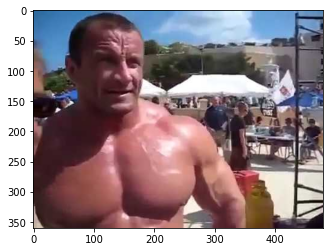

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
m_decrypted = [0] * len(m)
i = 0
j = 0
for value in range(len(img)):
  for pixel in range(len(img[value])):

    if (i >= len(m)):
      break
    if (j != 8 and j != 7):   
      bit = (img[value][pixel][0] % 2) * (2 ** j)
      m_decrypted[i] += bit
    j += 1
    if j >= 9:
      j = 0
      i += 1     

print(m_decrypted[:20], '...')

[65, 108, 101, 32, 116, 111, 32, 98, 121, 32, 110, 105, 99, 32, 110, 105, 101, 32, 100, 97] ...


In [9]:
(score, diff) = structural_similarity(img, img_source, full=True, channel_axis=-1)
diff = (diff * 255).astype("uint8")
print(f"Similarity (SSIM): {score}")

Similarity (SSIM): 0.999975744208981


In [10]:
print("Message:")
print(''.join(chr(elem) for elem in m_decrypted))

Message:
Ale to by nic nie dalo i tak, on mial... to by nic nie dalo nawet jakbym wygral nie daloby nic. Nie to jest mala roznica to by nic nie dalo bo on byl drugi w kulach, nawet jakbym byl pierwszy nie daloby nic bo ja bym musial byc pierwszy, on musialby byc czwarty a to by nic nie dalo. I tak by nic nie dalo i tak. yyyy nie ale to by nic nie dalo i tak. Nie nie daloby bo on byl drugi w kulach ja bym byl pierwszy nawet, to i tak by wygral. Nic by nie dalo. Nie daloby nic.
